In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-19 17:21:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 142.251.188.207, 192.178.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   161MB/s    in 0.6s    

2025-03-19 17:21:42 (161 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



**Get Familar with the dataset**

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
# visualize the images
import pathlib
import numpy as np
import matplotlib.pyplot as plt

data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([img.name for img in data_dir.glob("*")]))
class_name

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
  target_folder = target_dir+'/' + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f'image shape: {img.shape}')
  return img

image shape: (288, 512, 3)


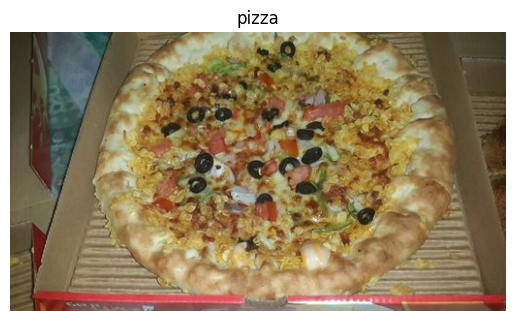

In [ ]:
img = view_random_images(target_dir='pizza_steak/train/', target_class='pizza')


**building a convolutional neural-net**
* load our image data
* preprocess our images


*   Build a **CNN** to find patterns in the data
*   Compile **CNN Model**
* fit **CNN Model** to training data



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_data_generator = ImageDataGenerator(rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)

train_data = 'pizza_steak/train'
test_data = 'pizza_steak/test'

train_data = train_data_generator.flow_from_directory(directory=train_data, batch_size=32, target_size=(224,224),
        class_mode="binary", seed=42)

validation_data = validation_data_generator.flow_from_directory(directory=test_data, batch_size=32, target_size=(224,224),
        class_mode="binary", seed=42)

# Build CNN
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224,224,3)
    ),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
    )
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data)
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 207ms/step - accuracy: 0.6233 - loss: 0.7364 - val_accuracy: 0.7880 - val_loss: 0.4830
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7789 - loss: 0.4755 - val_accuracy: 0.8160 - val_loss: 0.4215
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8069 - loss: 0.4400 - val_accuracy: 0.8000 - val_loss: 0.4322
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.8606 - loss: 0.3411 - val_accuracy: 0.8220 - val_loss: 0.4140
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9088 - loss: 0.2789 - val_accuracy: 0.8240 - val_loss: 0.3919


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 112360)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │         112,361 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,115 (1.32 MB)

 Trainable params: 115,371 (450.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,744 (901.35 KB)

**testing the data with [Tensorflowplayground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4,1&seed=0.04680&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)**

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=validation_data, validation_steps=len(validation_data))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.6138 - loss: 2.6012 - val_accuracy: 0.6680 - val_loss: 0.6129
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.7148 - loss: 0.6103 - val_accuracy: 0.7380 - val_loss: 0.5811
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7713 - loss: 0.5803 - val_accuracy: 0.7580 - val_loss: 0.5616
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.7767 - loss: 0.5692 - val_accuracy: 0.7600 - val_loss: 0.5565
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.7639 - loss: 0.5488 - val_accuracy: 0.7560 - val_loss: 0.5377


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

##Improve model performance
**Let's improve model_2, since it is performing teribly compared to the cnn(model_1) model**[link text](https://)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.5394 - loss: 10.3256 - val_accuracy: 0.6960 - val_loss: 0.9029
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.7111 - loss: 0.7933 - val_accuracy: 0.6560 - val_loss: 0.6947
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7613 - loss: 0.5777 - val_accuracy: 0.6360 - val_loss: 1.0052
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.6701 - loss: 1.0282 - val_accuracy: 0.7520 - val_loss: 0.5332
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7941 - loss: 0.4727 - val_accuracy: 0.7360 - val_loss: 0.5595


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,189,305 (172.38 MB)

 Trainable params: 15,063,101 (57.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,126,204 (114.92 MB)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')

])

model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [ ]:
len(train_data), len(validation_data)

(47, 16)

In [ ]:
history_3 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.5884 - loss: 1.2423 - val_accuracy: 0.7720 - val_loss: 0.4990
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8143 - loss: 0.4434 - val_accuracy: 0.7720 - val_loss: 0.4720
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8948 - loss: 0.2988 - val_accuracy: 0.8300 - val_loss: 0.3904
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9754 - loss: 0.1149 - val_accuracy: 0.8060 - val_loss: 0.4135
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.9982 - loss: 0.0453 - val_accuracy: 0.8180 - val_loss: 0.4100


In [ ]:
model_4.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 484000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │         484,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,455,575 (5.55 MB)

 Trainable params: 485,191 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 970,384 (3.70 MB)

##Plot History

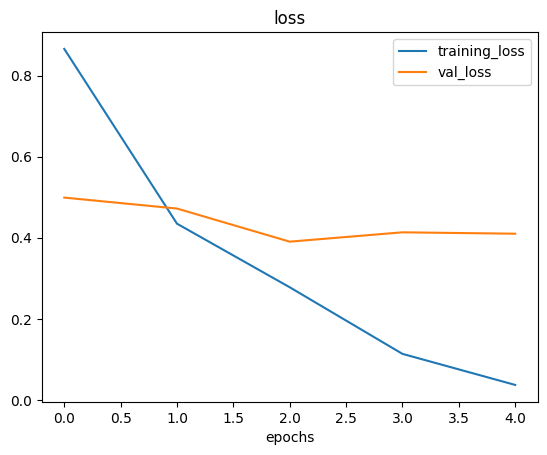

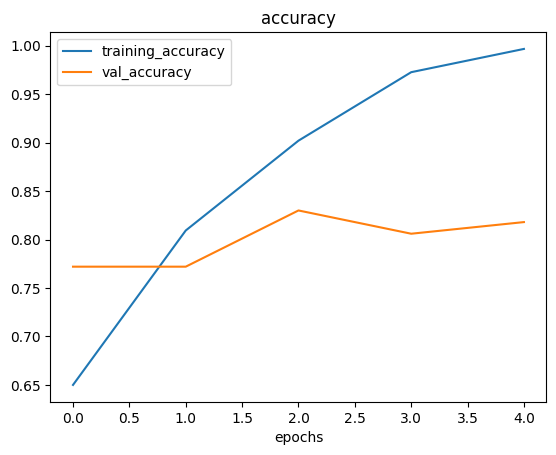

In [ ]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

plot_loss_curves(history_3)

from the above curves, few things to notice
* there is a very large margin between the two respective curves on each plots
* overfitting is occuring due to the validation_loss is increasing

**some factors that could induce overfitting**
* Increase number of Conv layers
* Increase the conv filters
* add another layer to output of the flatterned layer

**Ways to reduce overfitting(adding regularization)**
* Add data Augmentation
* Add regularization layers (such as MaxPool2D)
* Add more Data

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.5043 - loss: 0.6904 - val_accuracy: 0.6920 - val_loss: 0.6278
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7024 - loss: 0.5653 - val_accuracy: 0.8440 - val_loss: 0.4122
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7977 - loss: 0.4381 - val_accuracy: 0.8420 - val_loss: 0.3870
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8220 - loss: 0.4031 - val_accuracy: 0.8700 - val_loss: 0.3550
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.8420 - loss: 0.3694 - val_accuracy: 0.8620 - val_loss: 0.3279


In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 484000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │         484,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,455,575 (5.55 MB)

 Trainable params: 485,191 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 970,384 (3.70 MB)

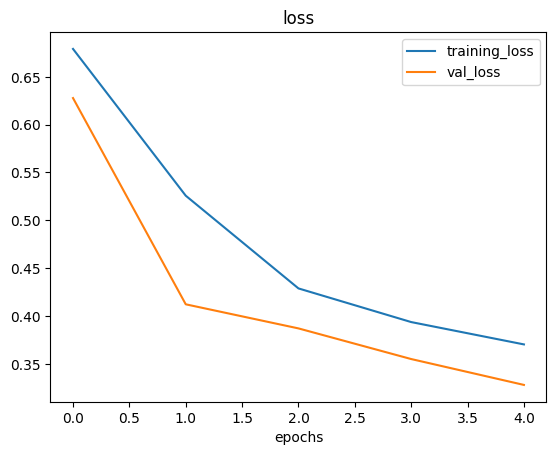

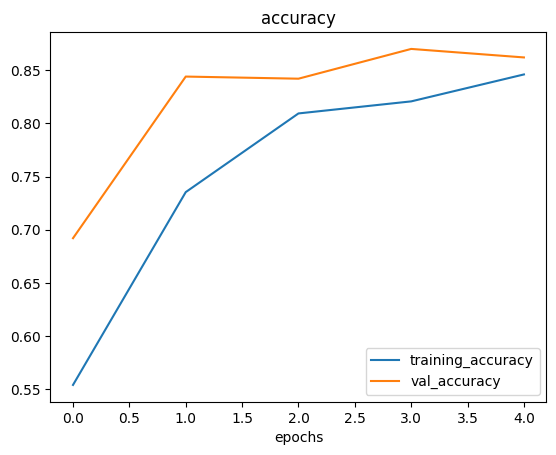

In [ ]:
plot_loss_curves(history_5)

##Exploring data augmentation

In [ ]:
train_data_generator_augmented = ImageDataGenerator(rescale=1/255.,
                                                    rotation_range=0.2,
                                                    shear_range=0.2,
                                                    zoom_range=0.2,
                                                    width_shift_range=0.2,
                                                    height_shift_range=0.3,
                                                    horizontal_flip=True)

train_data_generator = ImageDataGenerator(rescale=1/255.)

test_data_generator = ImageDataGenerator(rescale=1/255.)


In [ ]:
train_data_augumented = train_data_generator_augmented.flow_from_directory(data_dir, target_size=(224,224),
                                                                           batch_size=32, class_mode='binary', shuffle=False)
train_data = train_data_generator.flow_from_directory(data_dir, target_size=(224,224),
                                                      batch_size=32, class_mode='binary', seed=42)
validation_data = test_data_generator.flow_from_directory('pizza_steak/test', target_size=(224,224),
                                                          batch_size=32, class_mode='binary', seed=42)



Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augumented)

showing image nuber 10


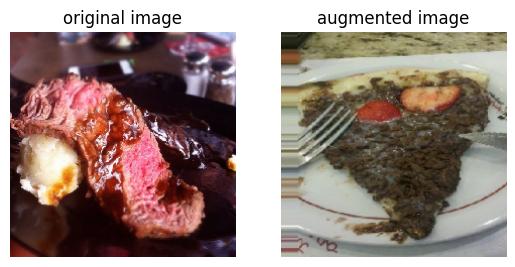

In [ ]:
import random
import matplotlib.pyplot as plt

random_index = random.randint(0, 10)
print(f"showing image nuber {random_index}")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2)  # 1 row, 2 columns

# Select the original image
original_image = images[random_index]

# Get the corresponding augmented image
augmented_image = augmented_images[random_index]

# Display the original image in the first subplot
axes[0].imshow(original_image)
axes[0].set_title("original image")
axes[0].axis("off")

# Display the augmented image in the second subplot
axes[1].imshow(augmented_image)
axes[1].set_title("augmented image")
axes[1].axis("off")

# Show the figure with both subplots
plt.show()

In [ ]:
# train a model with augumented data
model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history_6 = model_6.fit(train_data_augumented, epochs=5, steps_per_epoch=len(train_data_augumented),
            validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 438ms/step - accuracy: 0.5259 - loss: 0.7269 - val_accuracy: 0.4960 - val_loss: 0.6938
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.3424 - loss: 0.6955 - val_accuracy: 0.4600 - val_loss: 0.6933
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 441ms/step - accuracy: 0.4479 - loss: 0.6933 - val_accuracy: 0.4980 - val_loss: 0.6923
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.4972 - loss: 0.6962 - val_accuracy: 0.5460 - val_loss: 0.6918
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 401ms/step - accuracy: 0.4765 - loss: 0.6939 - val_accuracy: 0.5080 - val_loss: 0.6931


In [ ]:
model_6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

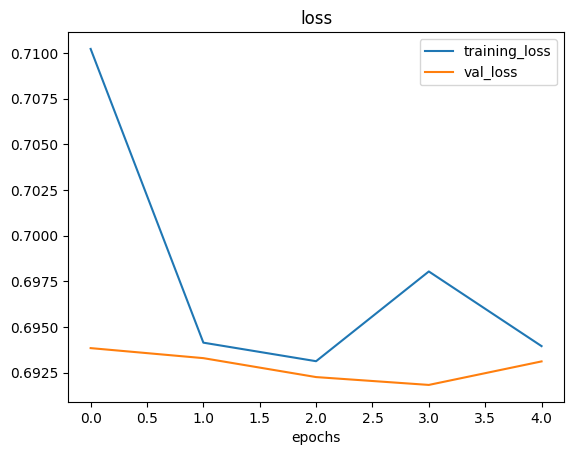

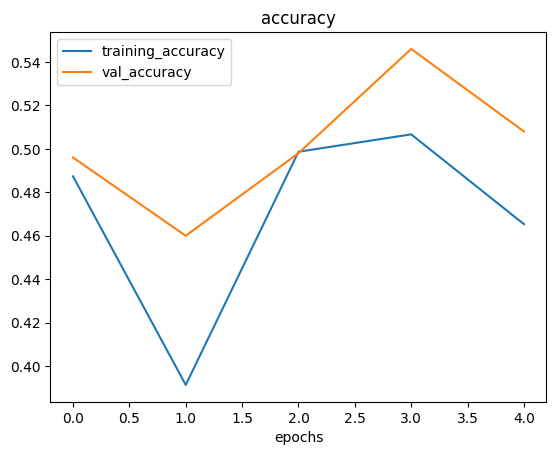

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# create model 7 with shuffle data
train_data_augumented_shuffled_data = train_data_generator_augmented.flow_from_directory(data_dir, target_size=(224,224),
                                                                           batch_size=32, class_mode='binary', shuffle=True)

model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

history_7 = model_7.fit(
    train_data_augumented_shuffled_data,
    epochs=5,
    steps_per_epoch=len(train_data_augumented_shuffled_data),
    validation_data=validation_data,
    validation_steps=len(validation_data)
)

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 437ms/step - accuracy: 0.5164 - loss: 0.7068 - val_accuracy: 0.7460 - val_loss: 0.5653
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.7128 - loss: 0.5767 - val_accuracy: 0.7960 - val_loss: 0.4943
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.7442 - loss: 0.5372 - val_accuracy: 0.8200 - val_loss: 0.3970
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.7453 - loss: 0.5023 - val_accuracy: 0.8360 - val_loss: 0.3924
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 417ms/step - accuracy: 0.8040 - loss: 0.4499 - val_accuracy: 0.8400 - val_loss: 0.3354


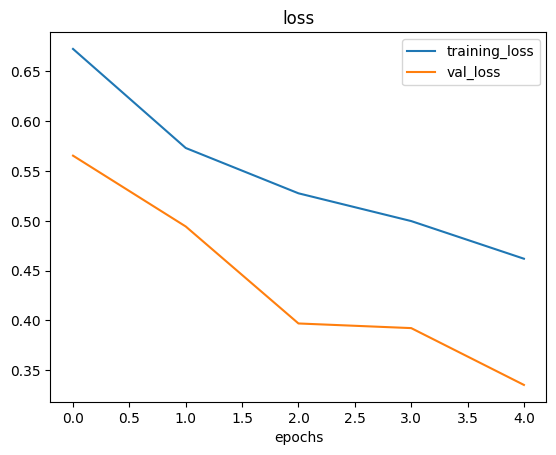

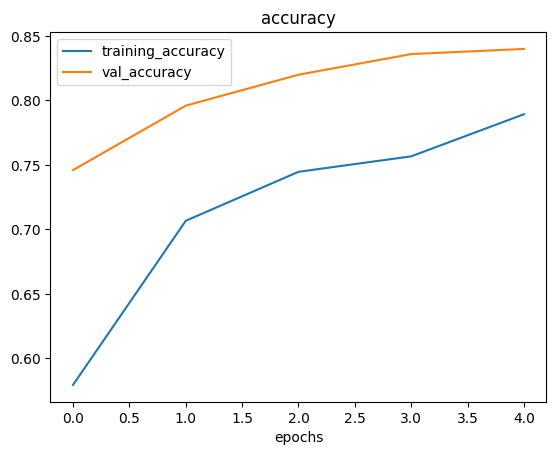

In [ ]:
plot_loss_curves(history_7)

###Make Predictions

In [ ]:
!wget https://raw.githubusercontent.com//mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg



--2025-03-19 17:28:33--  https://raw.githubusercontent.com//mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg [following]
--2025-03-19 17:28:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 404 Not Found
2025-03-19 17:28:33 ERROR 404: Not Found.



(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

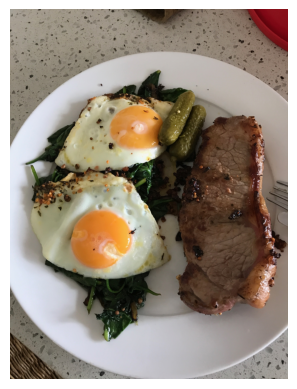

In [ ]:
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis('off')

before we can make predictions with any build model, we must ensure that the data we are making predictions on has the same format as the data used to train the model...
Building a helper function for image preprocessing

In [ ]:
def image_preprocessor(filename, image_shape=224):
    """
    reads an image(filename), turns the image into a tensor and reshapes it to(image_shape, image_shape, colour_channels)
    """
    image = tf.io.read_file(filename)
    image = tf.image.decode_image(image)
    image = tf.image.resize(image, size=[image_shape, image_shape])
    image = image/255

    return image

In [ ]:
steak = image_preprocessor('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

**The above prediction is a probablilty for a particular class, we can create a function the defines a boundary between the two class, thus, prediction is below 0.6 it is the first class, else, it is the second class**

In [ ]:
def distinguish_probability_class(model, filename, class_names=['pizza', 'steak'], threshold=0.6):
    """
    imports an image(filename), makes prediction with the model and compare the prediction to the threshold, a
    nd plots the image with the predicted class as the title
    """

    image = image_preprocessor(filename)
    prediction = model.predict(tf.expand_dims(image, axis=0))

    pred_class = ''
    if int(tf.round(prediction)) > threshold:
        pred_class = class_names[1]
    else:
        pred_class = class_names[0]

    plt.imshow(image)
    plt.title(f"prediction: {pred_class}")
    plt.axis('off')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


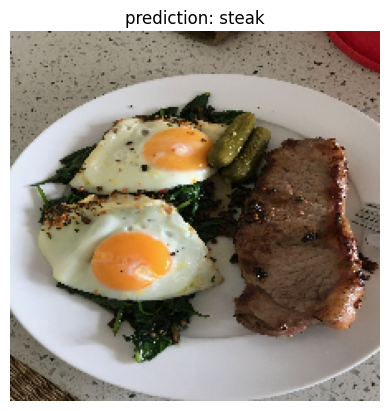

In [ ]:
distinguish_probability_class(model_7, '03-steak.jpeg')

--2025-03-19 17:28:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-03-19 17:28:35 ERROR 404: Not Found.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


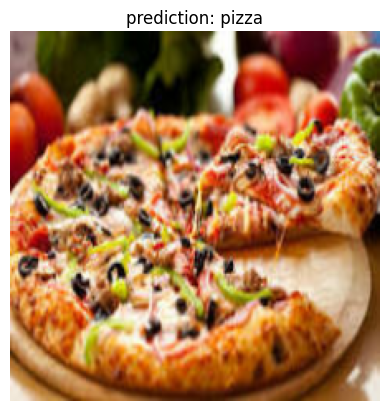

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
distinguish_probability_class(model_7, "img.jpeg")

###Multi-class classification
**standard steps**
* Become one with the data
* Preprocess the data(get the data ready for the model)
* Create a model
* Fit the model
* Evaluate the model (can visualize the performance of the model)
* Adjust hyperparameters and improve the model
* Repeat until satisfy

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_reference_file = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_reference_file.extractall()
zip_reference_file.close()

--2025-03-19 17:28:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 192.178.163.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  91.3MB/s    in 5.9s    

2025-03-19 17:28:42 (84.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
for dirpath, dirname, filename in os.walk('10_food_classes_all_data'):
    # print("something")
    print(f"there are {len(dirname)} directories and {len(filename)} images in '{dirpath}'")

there are 2 directories and 0 images in '10_food_classes_all_data'
there are 10 directories and 0 images in '10_food_classes_all_data/train'
there are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
there are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
there are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
there are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
there are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
there are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
there are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
there are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
there are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
there are 1

In [ ]:
train_data_dir = "10_food_classes_all_data/train"
test_data_dir = "10_food_classes_all_data/test"

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape: (512, 512, 3)


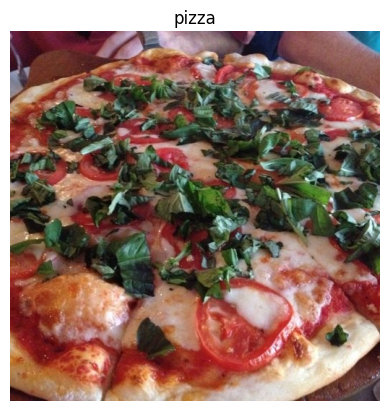

In [ ]:
image = view_random_images(target_dir=train_data_dir, target_class=random.choice(class_names))

###Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(rescale=1/255.)
test_data_generator = ImageDataGenerator(rescale=1/255)

train_data = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###Build the model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224, 3), activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')

])

model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.1641 - loss: 2.2285 - val_accuracy: 0.2748 - val_loss: 2.0025
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.2990 - loss: 1.9794 - val_accuracy: 0.3112 - val_loss: 1.9501
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.3546 - loss: 1.8602 - val_accuracy: 0.3352 - val_loss: 1.8688
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.3941 - loss: 1.7541 - val_accuracy: 0.3776 - val_loss: 1.7813
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 122ms/step - accuracy: 0.4234 - loss: 1.6896 - val_accuracy: 0.3700 - val_loss: 1.8156


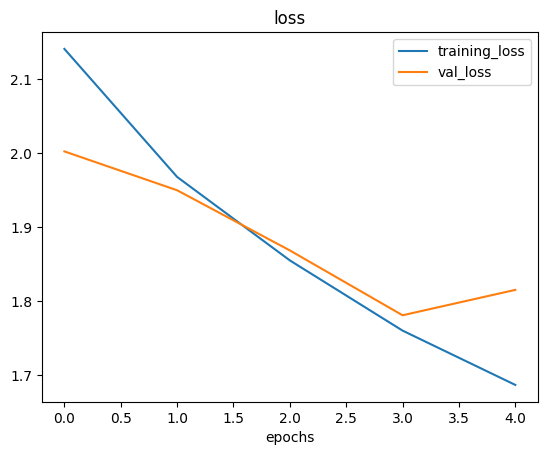

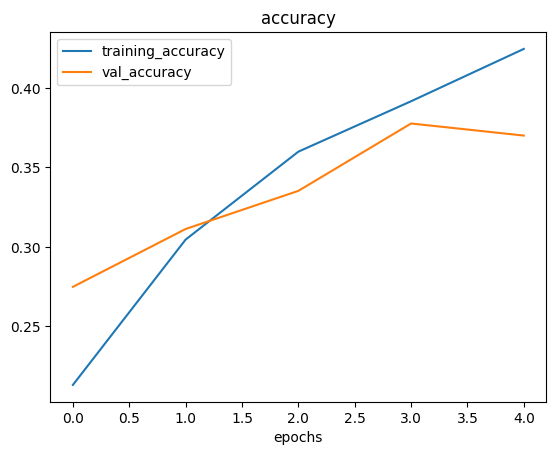

In [ ]:
plot_loss_curves(history_8)